In [1]:
import pandas as pd

# Get Metadata for [Separate_segmented_train_test_splits_80_20](https://huggingface.co/datasets/imageomics/2018-NEON-beetles/tree/main/Separate_segmented_train_test_splits_80_20)

Using [`sum-buddy`](https://github.com/Imageomics/sum-buddy) package within the [2018-NEON-beetles repository](https://huggingface.co/datasets/imageomics/2018-NEON-beetles):
```
sum-buddy -o Separate_segmented_train_test_splits_80_20/checksum_metadata.csv Separate_segmented_train_test_splits_80_20
```

In [2]:
df = pd.read_csv("../../2018-NEON-beetles/Separate_segmented_train_test_splits_80_20/checksum_metadata.csv")
df.head()

,filepath,filename,md5
0,Separate_segmented_train_test_splits_80_20/tes...,beetle_1176_1088.png,dcd4b79619ac96fd7519225f3bd46a86
1,Separate_segmented_train_test_splits_80_20/tes...,beetle_414_629.png,3f388c96812cbfcf6036939eae49afe0
2,Separate_segmented_train_test_splits_80_20/tes...,beetle_339_946.png,df7b91b86ee4dc3b0ee8e8000f8b6e18
3,Separate_segmented_train_test_splits_80_20/tes...,beetle_130_537.png,debd1c10ff568fd9ea48a025808cc324
4,Separate_segmented_train_test_splits_80_20/tes...,beetle_320_1374.png,87d5a67d7f6ac04882ea9ab96e21272f


## Make `split`, `species`, and `file_name` Columns

`file_name` will be path within the `Separate_segmented_train_test_splits_80_20` for the dataset viewer on HF (and we'll name the file `metadata.csv` at that point).

In [3]:
df["filepath"].values[:10]

array(['Separate_segmented_train_test_splits_80_20/test/advena/beetle_1176_1088.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_414_629.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_339_946.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_130_537.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_320_1374.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_749_1174.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_754_788.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_189_1137.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_509_696.png',
       'Separate_segmented_train_test_splits_80_20/test/advena/beetle_137_238.png'],
      dtype=object)

In [4]:
def get_split(filepath):
    return filepath.split("/")[1]

def get_species(filepath):
    return filepath.split("/")[2]

def get_file_name(filepath):
    return filepath.split("splits_80_20/")[1]

In [5]:
df["species"] = df["filepath"].apply(get_species)
df["split"] = df["filepath"].apply(get_split)
df["file_name"] = df["filepath"].apply(get_file_name)

df["subset"] = "separate segmented splits"

In [6]:
df.head()

,filepath,filename,md5,species,split,file_name,subset
0,Separate_segmented_train_test_splits_80_20/tes...,beetle_1176_1088.png,dcd4b79619ac96fd7519225f3bd46a86,advena,test,test/advena/beetle_1176_1088.png,separate segmented splits
1,Separate_segmented_train_test_splits_80_20/tes...,beetle_414_629.png,3f388c96812cbfcf6036939eae49afe0,advena,test,test/advena/beetle_414_629.png,separate segmented splits
2,Separate_segmented_train_test_splits_80_20/tes...,beetle_339_946.png,df7b91b86ee4dc3b0ee8e8000f8b6e18,advena,test,test/advena/beetle_339_946.png,separate segmented splits
3,Separate_segmented_train_test_splits_80_20/tes...,beetle_130_537.png,debd1c10ff568fd9ea48a025808cc324,advena,test,test/advena/beetle_130_537.png,separate segmented splits
4,Separate_segmented_train_test_splits_80_20/tes...,beetle_320_1374.png,87d5a67d7f6ac04882ea9ab96e21272f,advena,test,test/advena/beetle_320_1374.png,separate segmented splits


In [7]:
df.species.value_counts()

species
advena                   1355
impunctatus              1139
goryi                    1096
lachrymosus               613
torvus                    490
pensylvanicus             451
melanarius melanarius     380
restrictus                347
aestivus                  336
melanarius                292
grossus                   289
dubius                    282
Name: count, dtype: int64

## Display Distribution

In [8]:
import seaborn as sns

<Axes: xlabel='Count', ylabel='species'>

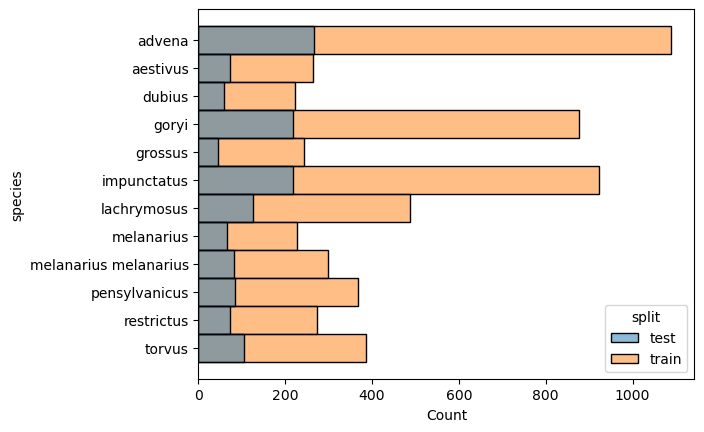

In [9]:
sns.histplot(df.sort_values("species"), y = "species", hue = "split")

## Save CSV

We don't need the `filepath` column since we're including the `file_name` for the purpose of the dataset viewer.

In [10]:
df[list(df.columns)[1:]].head()

,filename,md5,species,split,file_name,subset
0,beetle_1176_1088.png,dcd4b79619ac96fd7519225f3bd46a86,advena,test,test/advena/beetle_1176_1088.png,separate segmented splits
1,beetle_414_629.png,3f388c96812cbfcf6036939eae49afe0,advena,test,test/advena/beetle_414_629.png,separate segmented splits
2,beetle_339_946.png,df7b91b86ee4dc3b0ee8e8000f8b6e18,advena,test,test/advena/beetle_339_946.png,separate segmented splits
3,beetle_130_537.png,debd1c10ff568fd9ea48a025808cc324,advena,test,test/advena/beetle_130_537.png,separate segmented splits
4,beetle_320_1374.png,87d5a67d7f6ac04882ea9ab96e21272f,advena,test,test/advena/beetle_320_1374.png,separate segmented splits


In [11]:
df[list(df.columns)[1:]].to_csv("../../2018-NEON-beetles/Separate_segmented_train_test_splits_80_20/metadata.csv", index = False)